### EDA - Exploratory Data Analysis


A case is raised to evaluate internet postings, based on certain input parameters, it is intended to build a model that can predict if a posting will be successful or not, for this there is a dataset of postings and their number of views.

The objective variable is related to the number of visits to the post, if a post receives more than 1200 visits it is considered successful, otherwise it will be considered non-successful.

The first step is to explore the data


In [1]:
# to install the necessary packages, run the following command:

_ = !pip install -r ../requirements.txt

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load dataset

- Load the dataset from a csv file.

In [15]:
# load data
df = pd.read_csv('../src/data/raw/train.csv', sep=';') 

print(f"The Dataframe shape is: {df.shape}, so we have {df.shape[0]} rows and {df.shape[1]} columns.")

#checking the first 5 rows
print(f"The first 5 rows are:")

df.head(5)

The Dataframe shape is: (13186, 34), so we have 13186 rows and 34 columns.
The first 5 rows are:


,ID,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,...,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity,weekday,category,views
0,1,731,11,1089,0.418692,1.0,0.553468,20,20,0,...,1.0,-0.231548,-0.5,-0.050000,0.000000,0.000000,0.000000,monday,tech,1200
1,2,731,12,682,0.459542,1.0,0.634961,10,1,0,...,0.6,-0.220150,-0.6,-0.050000,0.750000,-0.250000,0.250000,monday,world,1600
2,3,731,8,397,0.624679,1.0,0.805668,11,1,0,...,1.0,-0.144643,-0.2,-0.100000,0.000000,0.000000,0.000000,monday,bus,3100
3,4,731,5,356,0.618234,1.0,0.766234,3,12,1,...,1.0,-0.372619,-0.7,-0.071429,0.454545,0.136364,0.136364,monday,entertainment,631
4,5,731,6,174,0.691860,1.0,0.902913,0,1,0,...,0.6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,monday,tech,401


## Exploratory Data Analysis

1 - Check missing values

2 - Check data types

3 - Detect numerical and categorical variables

4 - Analyze numerical variables

5 - Analyze categorical variables

6 - Analyze target variable




### 1 - Check missing values

In [16]:
#printing the number of missing values per column in a table format
tmp = pd.DataFrame(df.isnull().sum())
tmp.columns = ['Missing values']
print(f"the total number of missing values is: {tmp['Missing values'].sum()}")
print(f"The number of missing values per column is:")
tmp.T

the total number of missing values is: 0
The number of missing values per column is:


,ID,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,...,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity,weekday,category,views
Missing values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There is no missing values in dataset

### 2 - Check data types

In [17]:
print(f"The Data Type per columns are:")
tmp = pd.DataFrame(df.dtypes)
tmp.columns = ['Data Type']
tmp.T

The Data Type per columns are:


,ID,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,...,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity,weekday,category,views
Data Type,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,object,object,int64


In [18]:
#grouping by dtype and counting
print(f"The number of variables per Data Type are:")
tmp2 = tmp.groupby('Data Type').size()
tmp2


The number of variables per Data Type are:


Data Type
int64       9
float64    23
object      2
dtype: int64

### 3 - Detect numerical and categorical variables

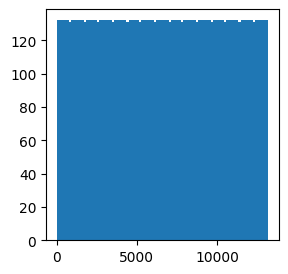

In [19]:
# - Checking if the id column has no important information

#set the figure size
plt.figure(figsize=(3, 3))
plt.hist(df['ID'], bins=100)
plt.show()

In [20]:
import re

# define target column, and retrieve list of attributes from the dataframe
id_cols = ['ID'] #If the dataset has an ID column, it should be included here because it will not be used in the model
target_col = 'views'
categ_cols = [] #If the dataset has known categorical columns, they should be included here
other_cols = [] #If the dataset has other columns that should not be included in the model, they should be included here

feature_cols = [x for x in df.columns.tolist() if x not in id_cols + other_cols + [target_col]]

numeric_features = [x for x in feature_cols if df[x].dtype != 'object' and not re.match('(^has_)', x) and x not in categ_cols]

categorical_features = [x for x in feature_cols if x not in numeric_features]

# check feature columns
print("Description of the feature columns: \n")
print('Number of feature cols: {}'.format(len(feature_cols)))
print('Number of categoric features: {}'.format(len(categorical_features)))
print('Number of numeric features: {} \n'.format(len(numeric_features)))
print('The numeric features are: \n {} \n'.format(numeric_features))
print('The categorical features are: \n {}'.format(categorical_features))

Description of the feature columns: 

Number of feature cols: 32
Number of categoric features: 2
Number of numeric features: 30 

The numeric features are: 
 ['days_diff', 'number_words_title', 'number_words_content', 'number_unique_words', 'number_no_stopwords', 'number_no_stopwords_unique', 'number_links', 'number_images', 'number_videos', 'average_word_length', 'number_of_keywords', 'score_topic_1', 'score_topic_2', 'score_topic_3', 'score_topic_4', 'score_topic_5', 'degree_of_subjectivity', 'degree_of_sentiment', 'pct_positive_words', 'pct_negative_words', 'pct_positive_words_over_sentiment_words', 'average_bias_positive_words', 'minimum_bias_positive_words', 'maximum_bias_positive_words', 'average_bias_negative_words', 'minimum_bias_negative_words', 'maximum_bias_negative_words', 'subjectivity_title', 'sentiment_title', 'abs_title_sentiment_polarity'] 

The categorical features are: 
 ['weekday', 'category']


### 4 - Analyze the numerical variables

In [21]:
print("Description of the numerical columns:")

df[numeric_features].describe().T

Description of the numerical columns:


,count,mean,std,min,25%,50%,75%,max
days_diff,13186.0,593.432504,82.812932,449.000000,521.000000,595.000000,667.000000,731.000000
number_words_title,13186.0,9.814879,1.964785,2.000000,8.000000,10.000000,11.000000,18.000000
number_words_content,13186.0,501.993554,421.588436,0.000000,228.000000,372.000000,646.000000,6336.000000
number_unique_words,13186.0,0.558257,0.118062,0.000000,0.486147,0.558198,0.632353,1.000000
number_no_stopwords,13186.0,0.992340,0.087187,0.000000,1.000000,1.000000,1.000000,1.000000
number_no_stopwords_unique,13186.0,0.700876,0.120197,0.000000,0.640398,0.706280,0.772727,1.000000
number_links,13186.0,10.531473,10.548145,0.000000,4.000000,7.000000,13.000000,171.000000
number_images,13186.0,3.875626,7.889616,0.000000,1.000000,1.000000,1.000000,99.000000
number_videos,13186.0,1.208099,4.264581,0.000000,0.000000,0.000000,1.000000,74.000000
average_word_length,13186.0,4.631731,0.493426,0.000000,4.473356,4.644974,4.833333,6.308411


Histograms for each numeric feature where the target is 0 in blue and 1 in red


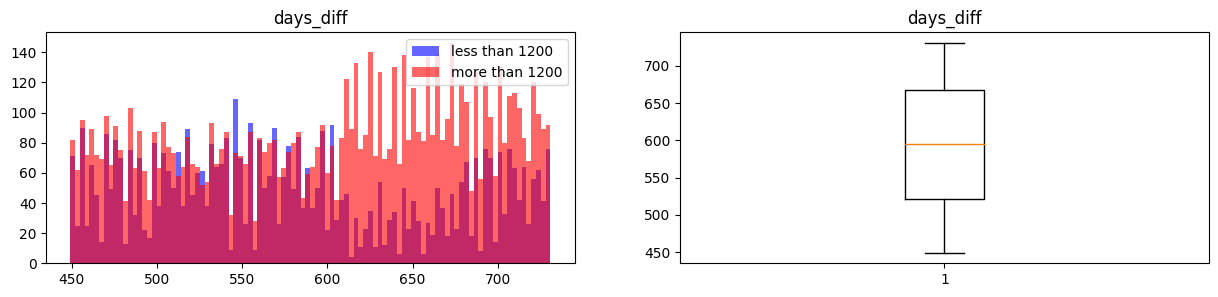

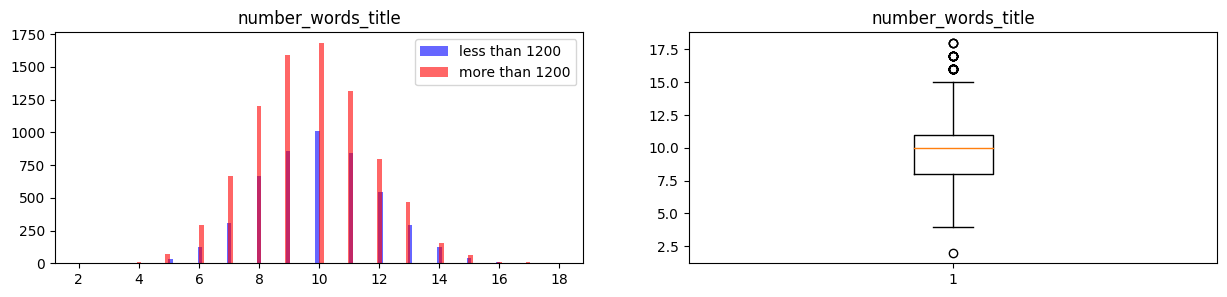

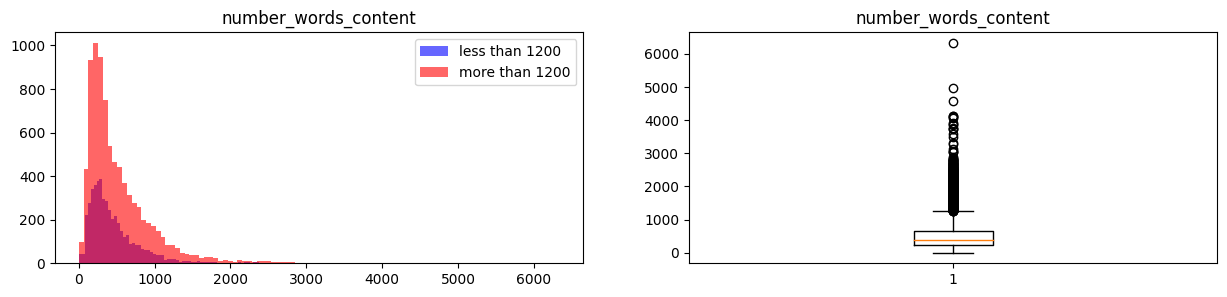

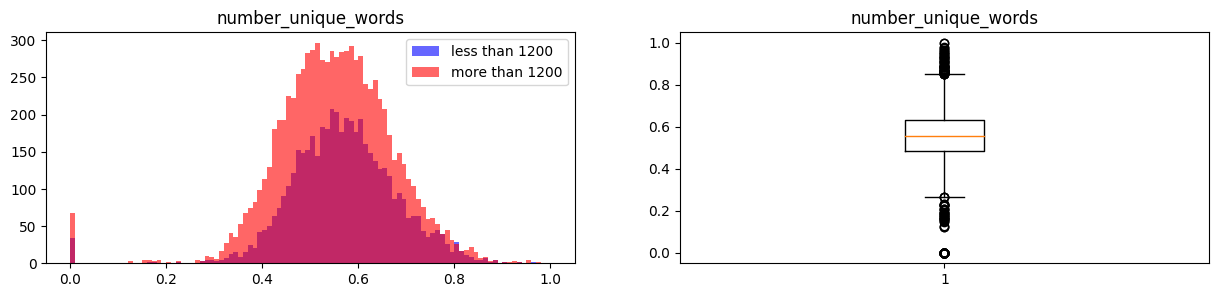

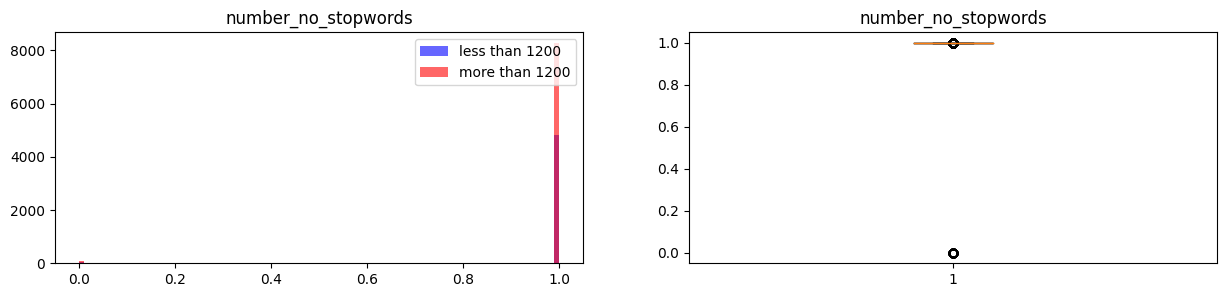

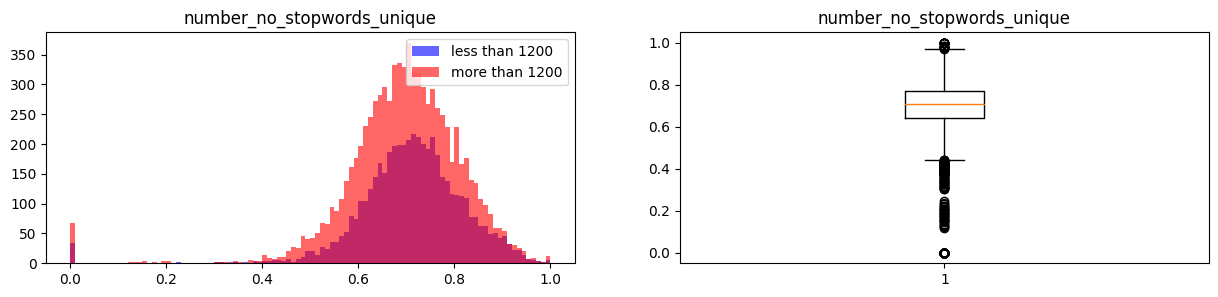

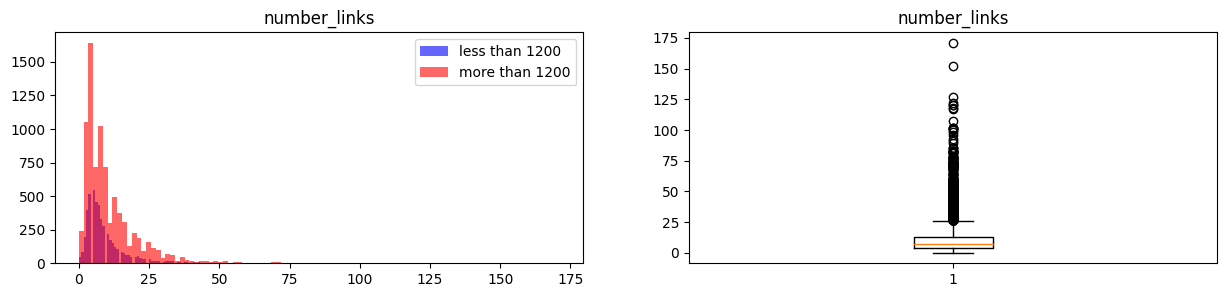

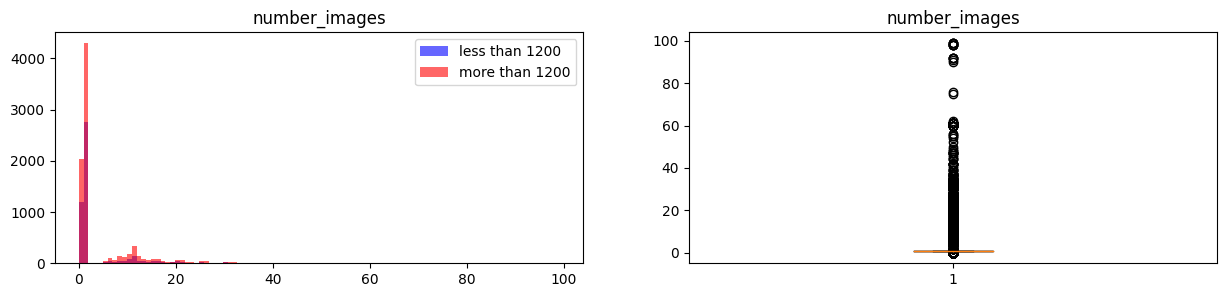

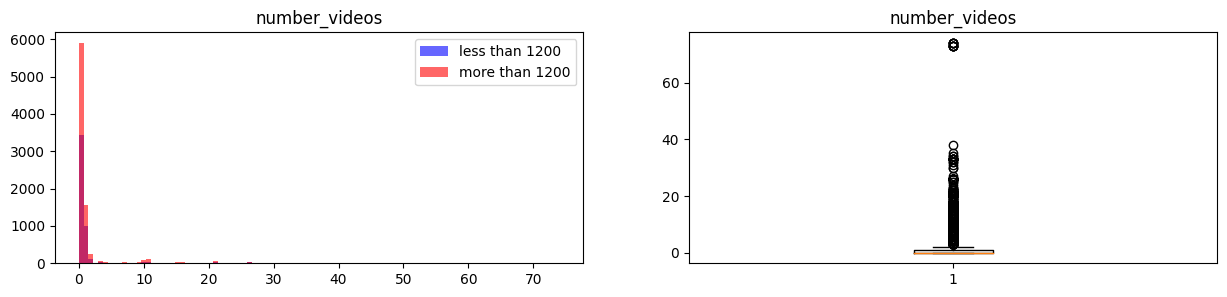

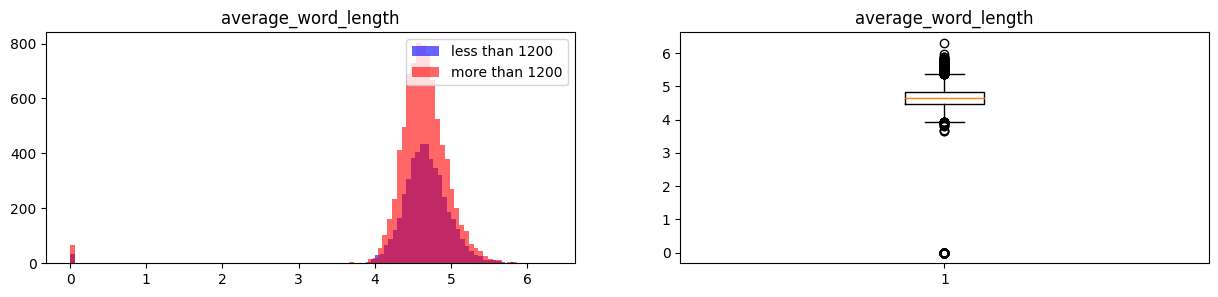

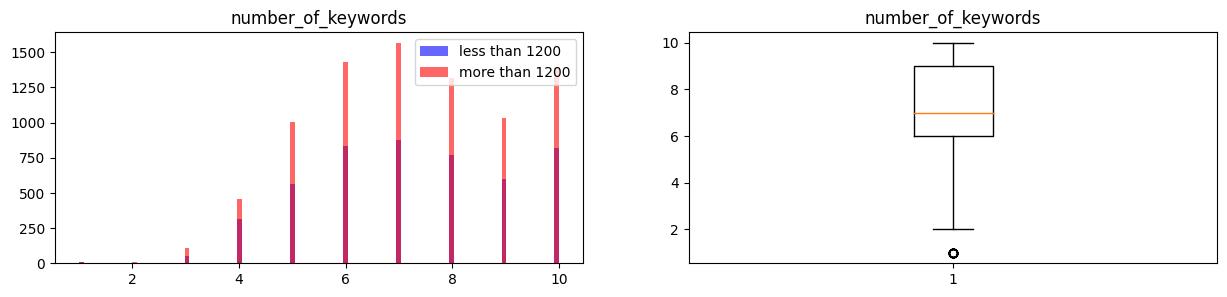

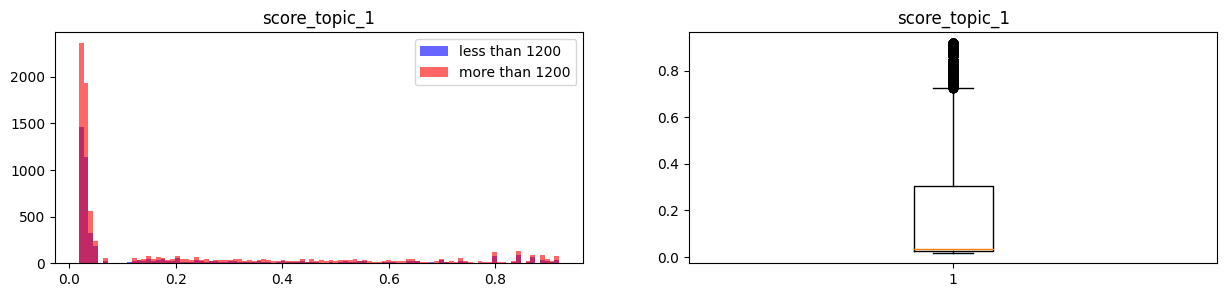

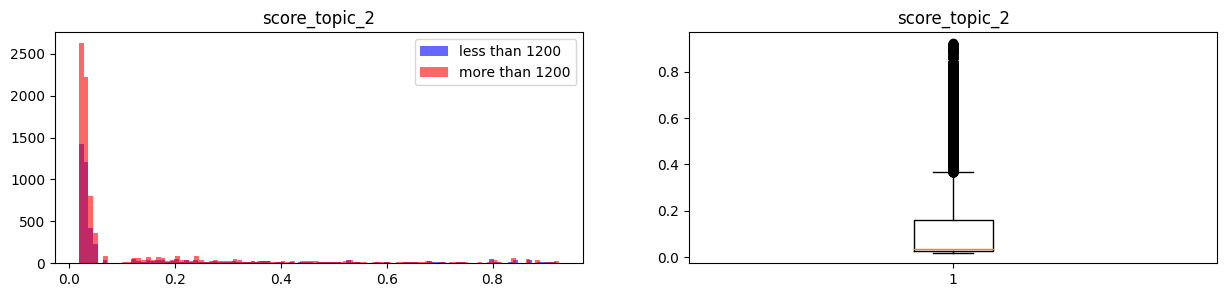

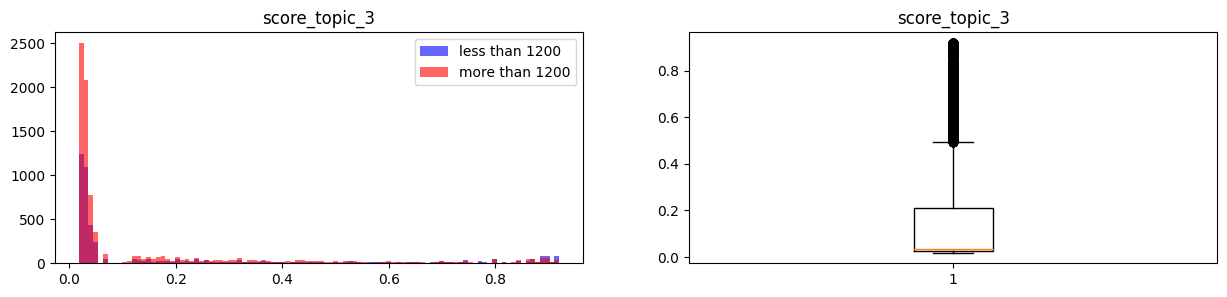

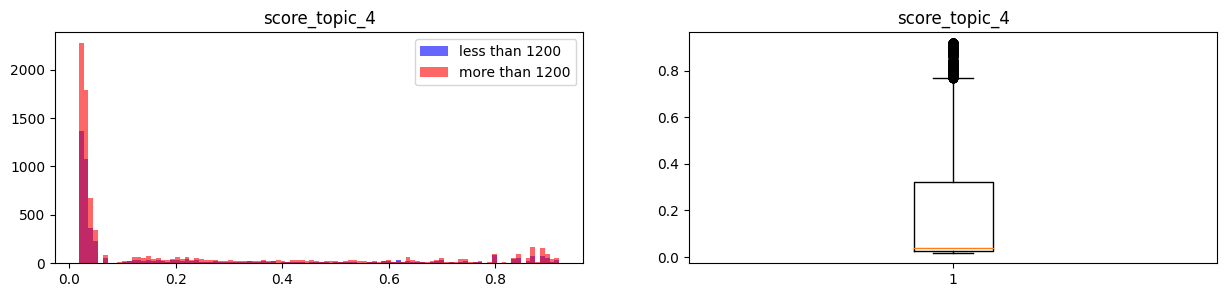

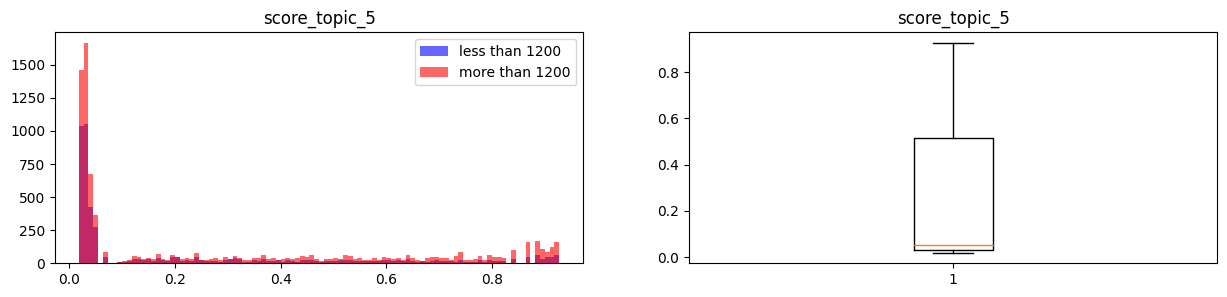

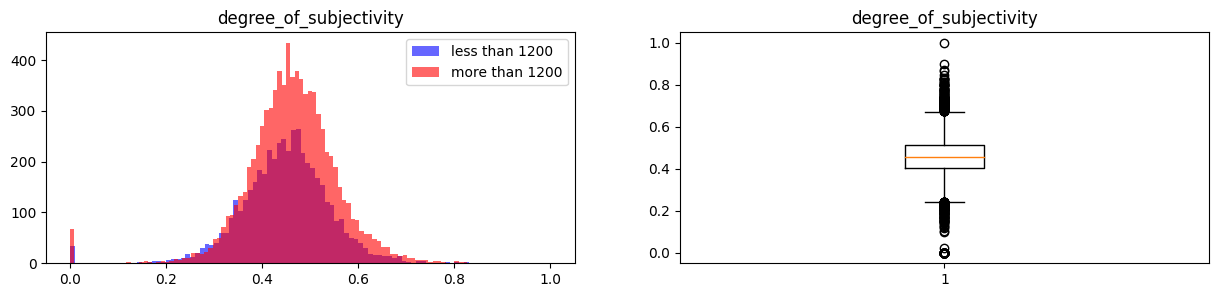

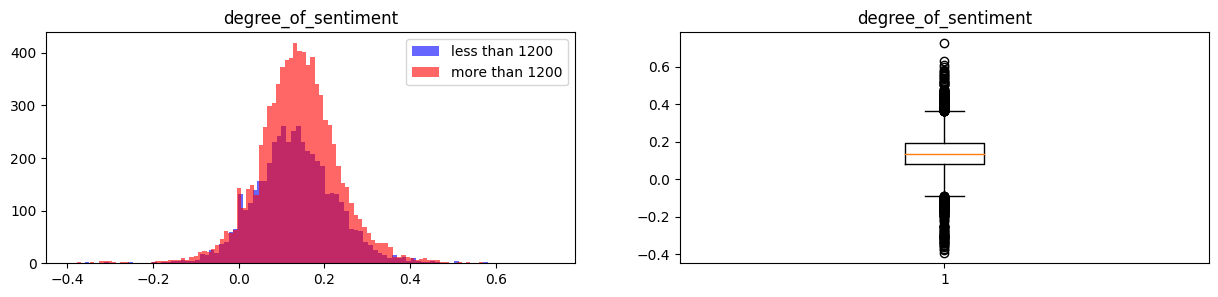

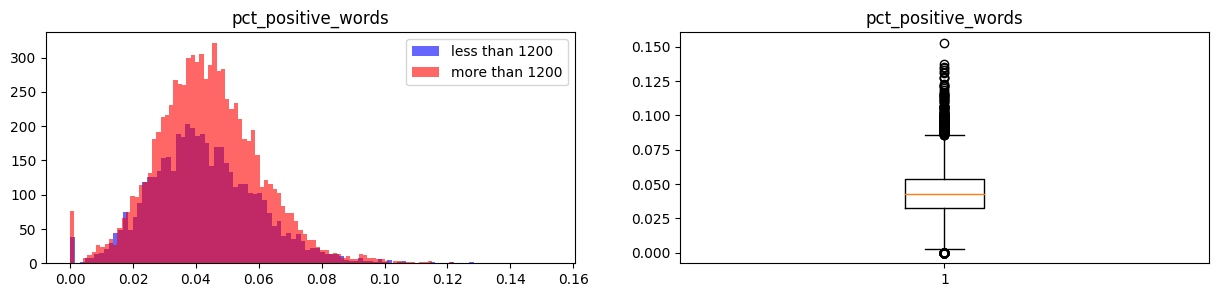

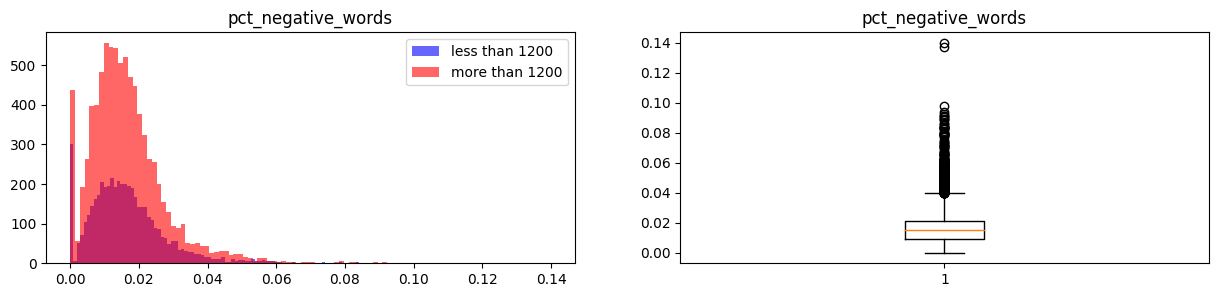

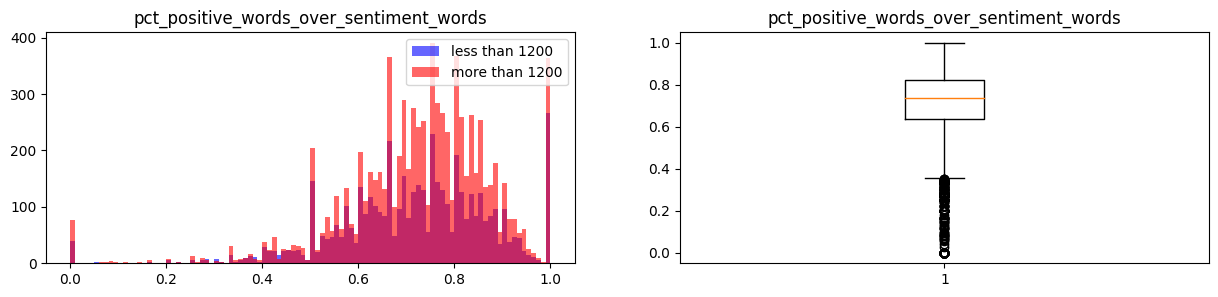

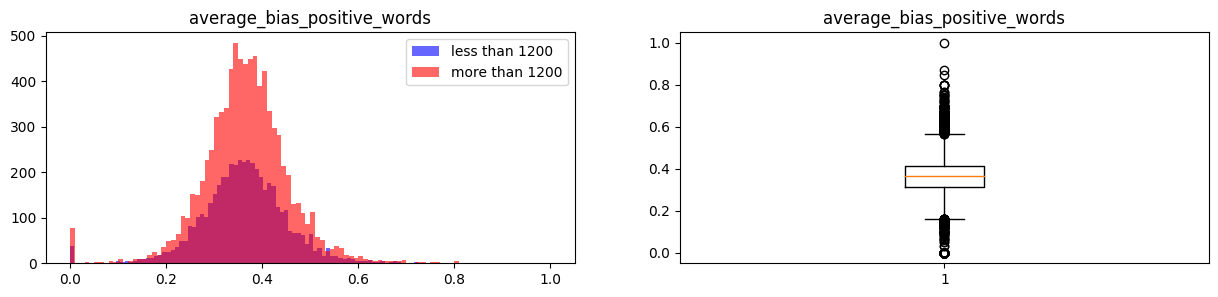

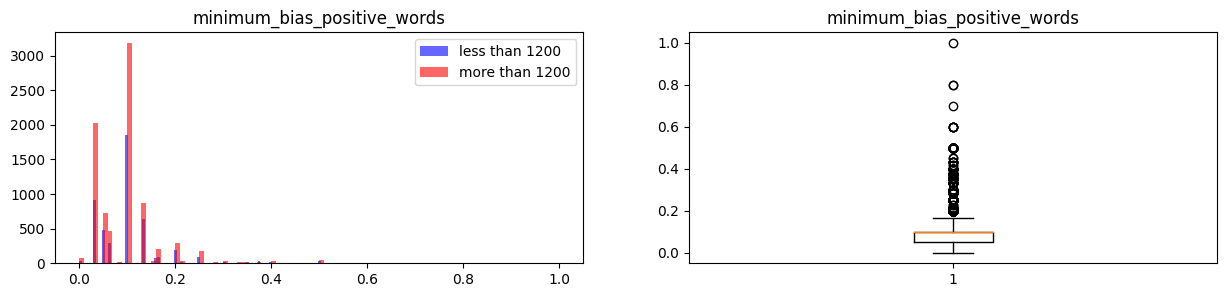

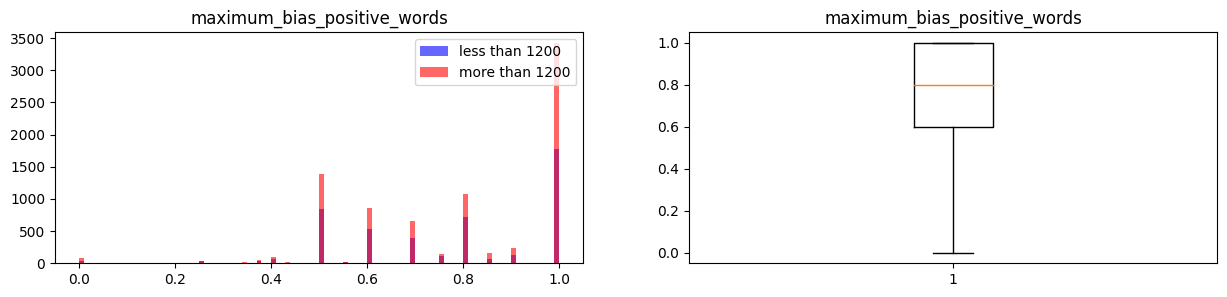

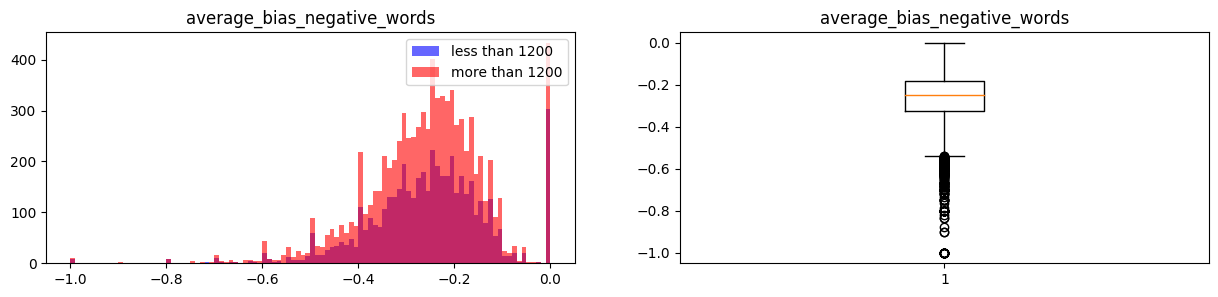

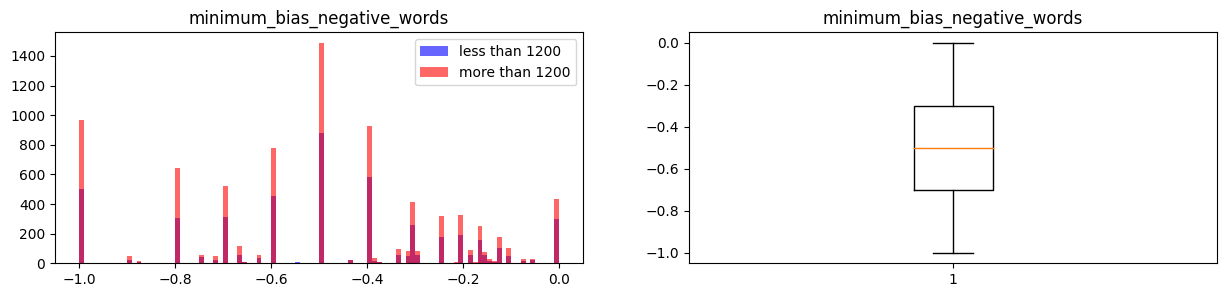

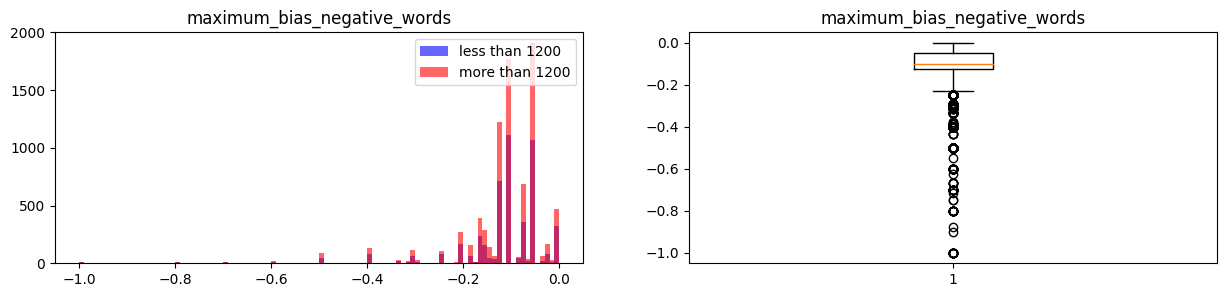

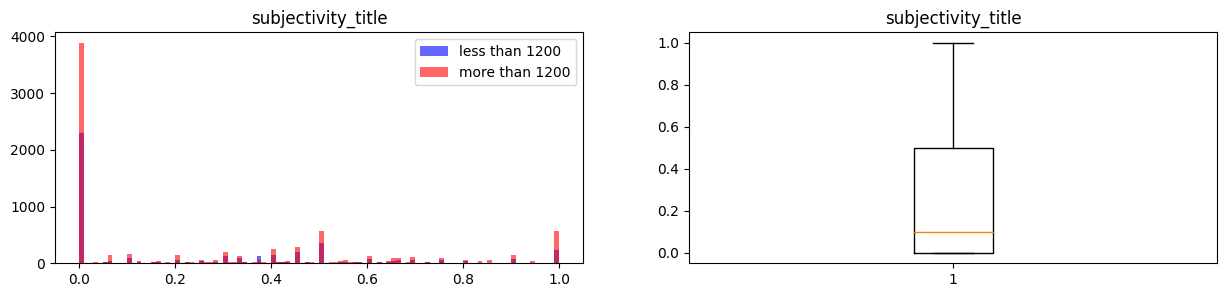

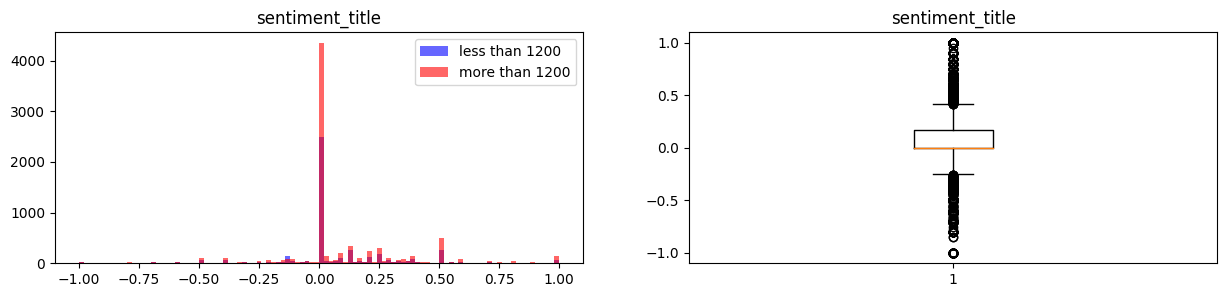

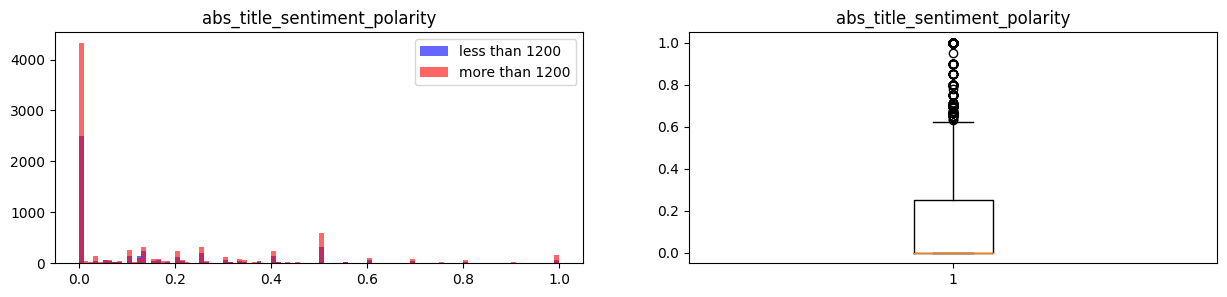

In [23]:
# Histograms for each numeric features
%matplotlib inline
# hist = df[numeric_features].hist(bins=30, sharey=True, figsize=(22, 22))
print("Histograms for each numeric feature where the target is 0 in blue and 1 in red")
#create histograms for each numeric feature where the target is 0 in blue and 1 in red
for col in numeric_features:
    #create two subplots for each numeric feature
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
    #plot the histogram for the first subplot
    ax1.hist(df.loc[df['views'] < 1200, col], bins=100, alpha=0.6, label='less than 1200', color='blue')
    ax1.hist(df.loc[df['views'] >= 1200, col], bins=100, alpha=0.6, label='more than 1200' , color='red')
    ax1.legend(loc='upper right')
    ax1.set_title(col)
    #plot the boxplot for the second subplot
    ax2.boxplot(df[col])
    ax2.set_title(col)
    plt.show()

In [11]:
# analyze the correlation between the features to remove the features with high correlation
corr = df[numeric_features].corr()
corr.style.background_gradient(cmap='coolwarm')

,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,average_word_length,number_of_keywords,score_topic_1,score_topic_2,score_topic_3,score_topic_4,score_topic_5,degree_of_subjectivity,degree_of_sentiment,pct_positive_words,pct_negative_words,pct_positive_words_over_sentiment_words,average_bias_positive_words,minimum_bias_positive_words,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity
days_diff,1.000000,-0.032912,-0.056148,0.037609,-0.006295,0.041229,-0.098130,-0.051603,0.012672,-0.018736,-0.091366,-0.003070,0.023335,-0.010313,0.001940,-0.007460,-0.014808,0.007693,0.012279,0.002831,-0.001582,-0.018195,0.000437,-0.051322,0.025414,0.036662,-0.002157,-0.001029,0.014578,0.006488
number_words_title,-0.032912,1.000000,-0.050258,0.060497,0.017401,0.052066,-0.075646,0.001910,0.063054,-0.049688,-0.009188,-0.043534,0.052278,-0.026231,0.076377,-0.048819,-0.019552,-0.039654,-0.001285,0.037794,-0.015498,0.001771,0.021512,-0.003001,-0.032610,-0.005656,-0.032641,0.083585,-0.002484,0.042982
number_words_content,-0.056148,-0.050258,1.000000,-0.636755,0.104616,-0.463335,0.504730,0.339400,0.107942,0.043791,0.142848,0.027368,-0.068495,0.059885,-0.085510,0.055670,0.067128,0.019549,0.107690,0.080254,0.030835,0.069564,-0.321999,0.410321,-0.086818,-0.422181,0.244810,-0.004123,0.050447,0.023960
number_unique_words,0.037609,0.060497,-0.636755,1.000000,0.415445,0.914361,-0.300633,-0.349757,0.033989,0.400856,-0.126505,-0.032306,0.062961,-0.056607,0.136902,-0.097775,0.198665,0.084012,0.130282,0.033704,0.183679,0.171676,0.380796,-0.172586,-0.036650,0.227208,-0.263337,0.014183,-0.052475,-0.014038
number_no_stopwords,-0.006295,0.017401,0.104616,0.415445,1.000000,0.512317,0.087721,0.019013,0.018362,0.824729,-0.032163,0.024385,-0.077279,0.006814,-0.007727,0.035776,0.420880,0.122478,0.225607,0.129407,0.393865,0.353875,0.121497,0.303896,-0.177646,-0.156671,-0.100207,-0.039358,-0.023775,-0.024754
number_no_stopwords_unique,0.041229,0.052066,-0.463335,0.914361,0.512317,1.000000,-0.294347,-0.414280,0.026392,0.418535,-0.109002,0.013160,0.019603,-0.014677,0.034573,-0.045812,0.223727,0.088823,0.174249,0.057304,0.218079,0.200311,0.276865,-0.052954,-0.061323,0.110212,-0.186077,-0.020102,-0.056671,-0.041081
number_links,-0.098130,-0.075646,0.504730,-0.300633,0.087721,-0.294347,1.000000,0.339366,0.002137,0.165629,0.129871,-0.034628,-0.079819,0.025936,0.147458,-0.070299,0.158891,0.077635,0.028864,0.000801,0.036264,0.146034,-0.143086,0.285763,-0.120196,-0.271338,0.088710,0.040327,0.045173,0.069662
number_images,-0.051603,0.001910,0.339400,-0.349757,0.019013,-0.414280,0.339366,1.000000,-0.083273,0.008266,0.073024,-0.144284,0.050221,-0.080382,0.143693,0.023113,0.086631,-0.011324,-0.013973,0.084875,-0.039412,0.063766,-0.072175,0.166109,-0.065930,-0.139210,0.045133,0.046020,0.033852,0.057252
number_videos,0.012672,0.063054,0.107942,0.033989,0.018362,0.026392,0.002137,-0.083273,1.000000,-0.034168,-0.014578,-0.072357,-0.008470,-0.094396,0.322639,-0.152755,0.093514,-0.050047,0.061311,0.205694,-0.087992,0.117008,0.002782,0.152065,-0.117293,-0.156555,0.037981,0.070345,0.019754,0.059823
average_word_length,-0.018736,-0.049688,0.043791,0.400856,0.824729,0.418535,0.165629,0.008266,-0.034168,1.000000,-0.019942,0.060576,-0.089151,0.143003,-0.033756,-0.074807,0.289356,0.070070,0.125725,0.070329,0.316784,0.256233,0.098932,0.193843,-0.123967,-0.090031,-0.086473,-0.052083,-0.032716,-0.037266


### 5 - Analyze categorical variables

the categorical features are:  ['weekday', 'category']
The unique values for weekday are: ['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']
Number of unique values for weekday is 7
Number of missing values for weekday is 0


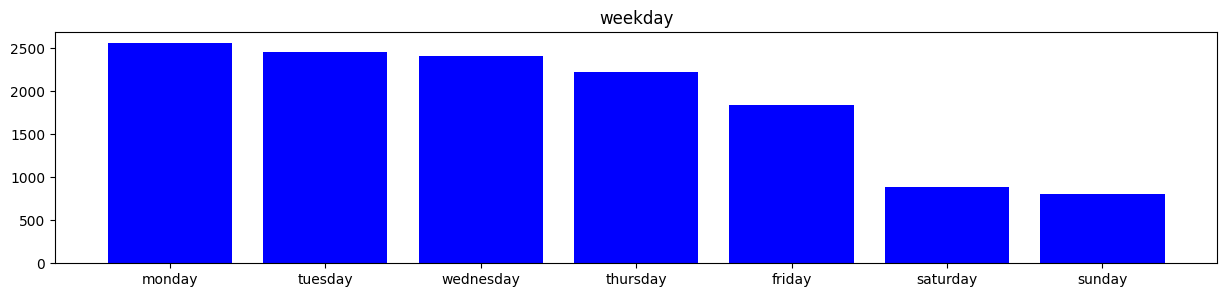

The unique values for category are: ['tech' 'world' 'bus' 'entertainment' 'other' 'lifestyle' 'socmed']
Number of unique values for category is 7
Number of missing values for category is 0


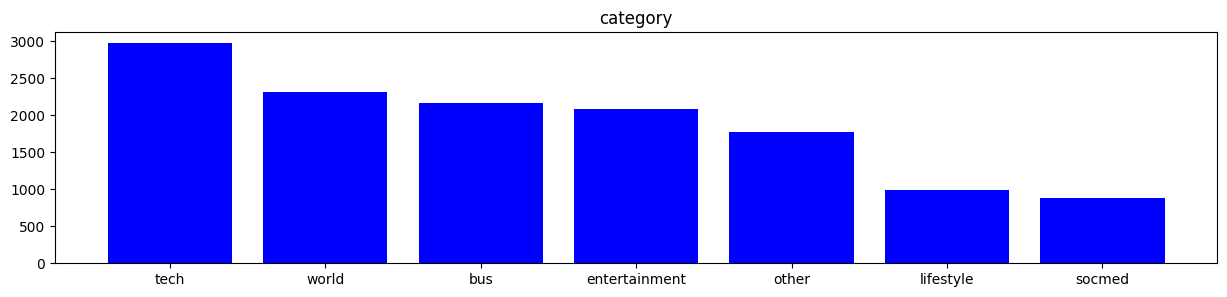

In [51]:
print("the categorical features are: ", categorical_features)

for col in categorical_features:
    print(f"The unique values for {col} are: {df[col].unique()}")
    print(f"Number of unique values for {col} is {df[col].nunique()}")
    print(f"Number of missing values for {col} is {df[col].isnull().sum()}")
    #plot the bar chart for each categorical feature
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(df[col].unique(), df[col].value_counts(), color='blue')
    ax.set_title(col)
    plt.show()


### 6 - Analyze the target variable

1 - Binarize target variable, 1 if more than 2000 visits, 0 otherwise.

2 - We check the proportion of the data of the objective variable, to see if it is a balanced or unbalanced classification problem.


In [12]:
#use the data from the previous step
try:
    df = dataset.copy()
except:
    print("Please run the previous steps first")

# binarize target column
if df[target_col].unique().shape[0] > 2:
    df[target_col] = df[target_col].apply(lambda x: 1 if x > 1200 else 0)
else:
    pass

# check target column proportion
print("Description of the target column: \n")
print(df[target_col].value_counts(normalize=True))


Please run the previous steps first
Description of the target column: 

1    0.580843
0    0.419157
Name: views, dtype: float64



- We visually verified the distribution of the target variable.

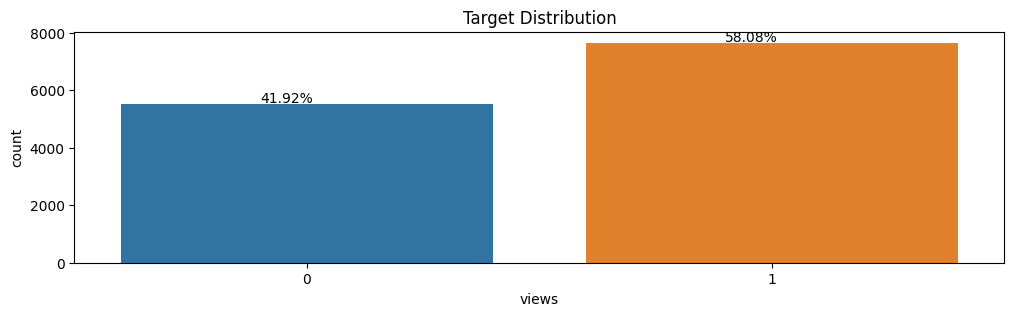

In [13]:
#plot of the target column

plt.figure(figsize=(12,3))
ax = sns.countplot(x=target_col, data=df)
plt.title('Target Distribution')
# add annotations 
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+50))

plt.show()

The target variable is unbalanced, there are more posts with more than 1200 visits than posts with less than 1200 visits.
